# Model Selection In-Class Exercise

In this example, you will a linear model to data and select the model order by model order selection.  First load the standard packages.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pickle
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

## Load the Data

The data in this exercise is completely synthetic.  You can load it with the following commmand.

In [2]:
fn_src = 'https://raw.githubusercontent.com/sdrangan/introml/master/unit04_model_sel/synth_data.p'
fn_dst = 'synth_data.p'

import os
from six.moves import urllib

if os.path.isfile(fn_dst):
    print('File %s is already downloaded' % fn_dst)
else:        
    urllib.request.urlretrieve(fn_src, fn_dst)
    print('File %s downloaded' % fn_dst)

with open(fn_dst,'rb') as fp:
    x,y = pickle.load(fp)

File synth_data.p is already downloaded


Plot the data `y` vs. `x` using a scatter plot. 

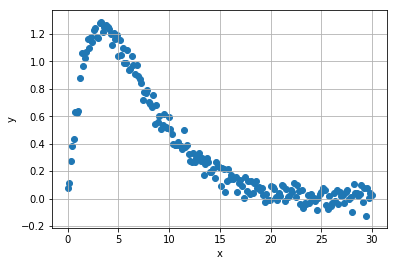

In [3]:
# TODO
plt.scatter(x,y)
plt.xlabel('x')
plt.ylabel('y')
plt.grid()
plt.show()

## Fit the Data

We will now try to fit the data.  First, split the data into training and test.  You can use the `train_test_split()` method in the `sklearn` package.

In [8]:
# TODO
# xtr, xts, ytr, yts = train_test_split(...)
xtr, xts, ytr, yts = train_test_split(x, y)

(150,) (50,)


Now try to fit a linear model to the data.  You can pick any linear model with a variable number `d` of basis functions.  For example, you can use the polynomials up to degree `d-1`.  

For each model order `d`:
* Fit the model on the training data
* Test the model on the test data

Plot the test error vs. `d`.  Select the model order `dopt` with the lowest test error.

[7.85429732 2.53964303 2.13425315 1.49394372 0.64740639 0.24287838
 0.11931095 0.11372913 0.11222421 0.11370347]


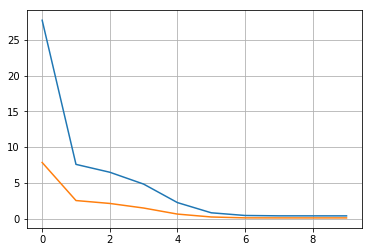

In [31]:
# TODO
import numpy.polynomial.polynomial as poly

d = 10
order = np.arange(d) #max order of 10
error = np.zeros(d)
error_train = np.zeros(d)

for i in order:    
    beta = poly.polyfit(xtr,ytr,i)
    yes = poly.polyval(xts, beta)
    ytr_es = poly.polyval(xtr, beta)
    error[i] = sum(yts**2) + sum(yes**2) - 2*np.dot(yts, yes)
    error_train[i] = sum(ytr**2) + sum(ytr_es**2) - 2*np.dot(ytr, ytr_es)
print(error)

plt.plot(order,error_train)
plt.plot(order,error)
plt.grid()
plt.show()

Select the optimal model order `dopt`.  Re-train the model for that model order.  On one plot:
* Plot the predicted value `yhat` vs. `x` for your model for `x in [0,35]`
* Plot a scatter plot of the test data `xts` vs. `yts`

Does your model fit the test data well?
Does it extrapolate reasonably in the range `x >= 30`?

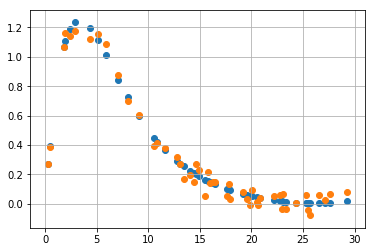

8


In [26]:
# TODO
dopt = np.argmin(error)
beta_opt = poly.polyfit(xtr,ytr,dopt)
yes_opt = poly.polyval(xts, beta_opt)



plt.scatter(xts,yes_opt)
plt.scatter(xts,yts)
plt.grid()
plt.show()

print(dopt)